# 필요 패키지, 파일 로드

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy
%matplotlib inline

test = pd.read_csv('C:/Users/park/Desktop/데이터사이언스/data/Titanic_test.csv')
train = pd.read_csv('C:/Users/park/Desktop/데이터사이언스/data/Titanic_train.csv')

# 데이터 확인

In [2]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# 1. 탐색적 데이터 분석

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## 1) 결측치 확인

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## 2) 생존율에 영향을 미치는 요인 분석

### (1) 클래스와 요금 관계

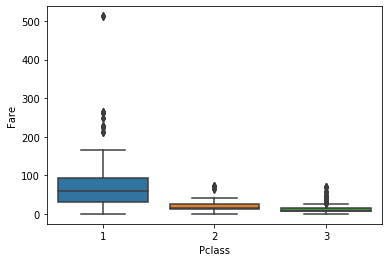

In [9]:
sns.boxplot(x='Pclass', y='Fare', data=train)

### (2) 전체적인 수 파악

In [10]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [12]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

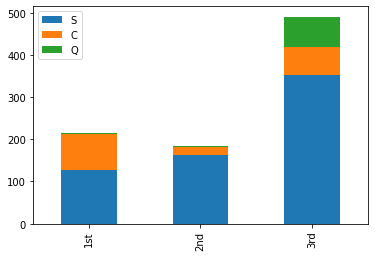

In [13]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st', '2nd', '3rd']
df.plot(kind='bar', stacked=True)

### (3) 클래스와 생존

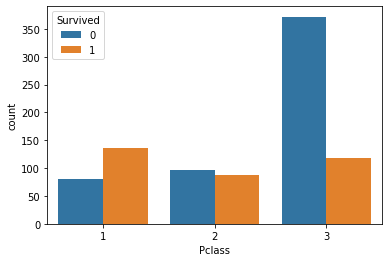

In [14]:
sns.countplot(x='Pclass', hue='Survived', data=train)

### (4) 성별과 생존

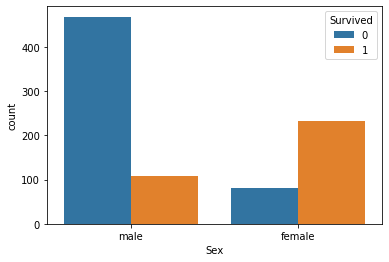

In [15]:
sns.countplot(x='Sex', hue='Survived', data=train)

 나이의 결측값을 나이의 중앙값으로 대체

In [16]:
medi_age = train['Age'].median()
train.loc[pd.isnull(train["Age"]), "Age"] = medi_age
train[pd.isnull(train["Age"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


 전체 나이 분포 그래프

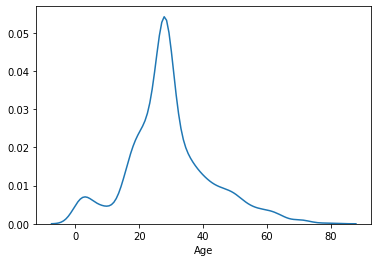

In [17]:
sns.distplot(train["Age"],hist=False)

### (5) 나이와 생존

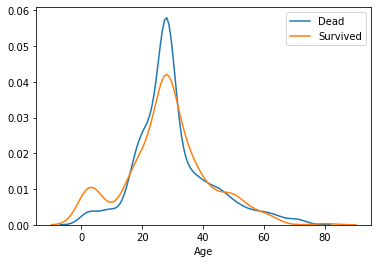

In [18]:
Dead=train[train['Survived'] == 0]
Survived =train[train['Survived']==1]

sns.distplot(Dead['Age'], hist=False, label="Dead")
sns.distplot(Survived['Age'], hist=False, label="Survived")

### (6) 승선지와 생존 

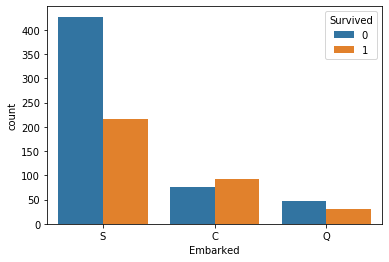

In [19]:
sns.countplot(x='Embarked', hue='Survived', data=train)

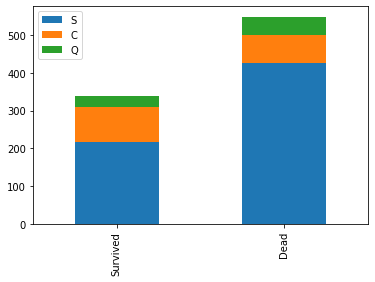

In [20]:
Survived = train[train['Survived']==1]['Embarked'].value_counts()
Dead = train[train['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([Survived,Dead])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True)

### (7) 형제, 배우자와 생존

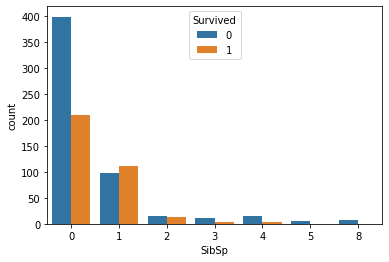

In [21]:
sns.countplot(x='SibSp', hue='Survived', data=train)

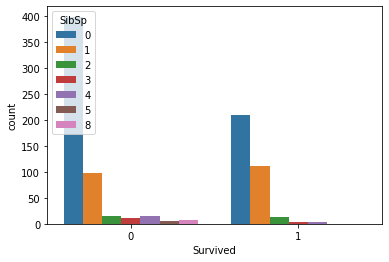

In [22]:
sns.countplot(x='Survived', hue='SibSp', data=train)

 누적 막대그래프

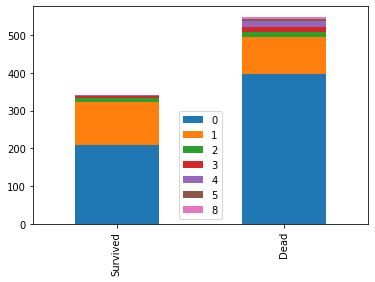

In [23]:
Survived = train[train['Survived']==1]['SibSp'].value_counts()
Dead = train[train['Survived']==0]['SibSp'].value_counts()
df = pd.DataFrame([Survived,Dead])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True)

### (8) 부모, 자식과 생존

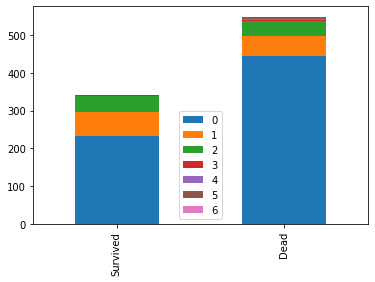

In [24]:
Survived = train[train['Survived']==1]['Parch'].value_counts()
Dead = train[train['Survived']==0]['Parch'].value_counts()
df = pd.DataFrame([Survived,Dead])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True)

 전체 요금 그래프

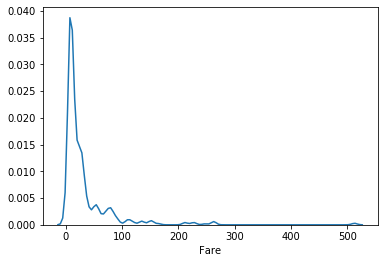

In [25]:
sns.distplot(train["Fare"],hist=False)

### (9) 요금과 생존

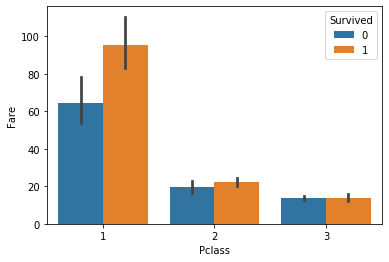

In [26]:
sns.barplot(data=train, x='Pclass', y='Fare', hue="Survived")

 혼자 500이상 낸 사람은 결국 살았나 보다

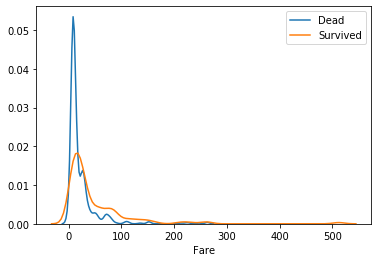

In [27]:
Dead=train[train['Survived'] == 0]
Survived =train[train['Survived']==1]

sns.distplot(Dead['Fare'],hist=False, label="Dead")
sns.distplot(Survived['Fare'],hist=False, label="Survived")

# 2. 데이터 전처리

## 1) 이름 처리

In [28]:
train_test_data = [train, test] 
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-za-z]+)\.', expand=False)

In [29]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Countess      1
Ms            1
Sir           1
Don           1
Lady          1
Jonkheer      1
Mme           1
Capt          1
Name: Title, dtype: int64

In [30]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

### (1) 각 호칭을 딕셔너리 자료형을 사용해서 번호를 부여한다

In [31]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2,
                "Master":4, "Dr":3, "Rev":3, "Col": 3, 'Ms': 3, 'Mlle': 3, "Major": 3, 'Lady': 3, 'Capt': 3,
                 'Sir': 3, 'Don': 3, 'Mme':3, 'Jonkheer': 3, 'Countess': 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


### (2) 필요없어진 이름 변수 삭제

In [33]:
train. drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [34]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [35]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2.0


## 2) 성별 처리

### (1) 성별도 딕셔너리 자료형을 사용해 번호를 부여

In [36]:
sex_mapping = {"male": 0, "female":1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [37]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,1,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,1,28.0,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,0,26.0,0,0,111369,30.0000,C148,C,0


## 3) 나이 처리

In [38]:
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace=True)

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [40]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <=5, 'Age']=0,
    dataset.loc[(dataset['Age'] > 5) & (dataset['Age'] <=15), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 15) & (dataset['Age'] <=25), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <=35), 'Age'] = 3,
    dataset.loc[(dataset['Age'] > 35) & (dataset['Age'] <=45), 'Age'] = 4,
    dataset.loc[(dataset['Age'] > 45) & (dataset['Age'] <=55), 'Age'] = 5,
    dataset.loc[(dataset['Age'] > 55) & (dataset['Age'] <=65), 'Age'] = 6,
    dataset.loc[(dataset['Age'] > 65), 'Age'] = 7

## 4) 승선지 처리

In [41]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [42]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,2.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,4.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,3.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,3.0,0,0,373450,8.0500,NaN,S,0


In [43]:
embarked_mapping = {'S':0, 'C':1, 'Q':2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

## 5) 요금 처리

In [44]:
train["Fare"].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace=True)
test["Fare"].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace=True)

(0, 20)

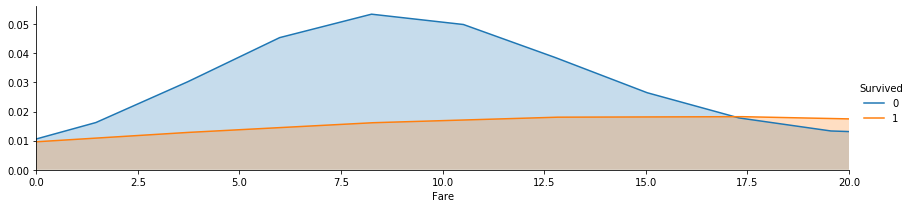

In [45]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0,20)

In [46]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <=20, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 20) & (dataset['Fare'] <=40), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 40) & (dataset['Fare'] <=60), 'Fare'] = 2,
    dataset.loc[(dataset['Fare'] > 60) & (dataset['Fare'] <=80), 'Fare'] = 3,
    dataset.loc[(dataset['Fare'] > 80) & (dataset['Fare'] <=100), 'Fare'] = 4,
    dataset.loc[(dataset['Fare'] > 100) & (dataset['Fare'] <=120), 'Fare'] = 5,
    dataset.loc[(dataset['Fare'] > 120) & (dataset['Fare'] <=140), 'Fare'] = 6,
    dataset.loc[ dataset['Fare'] > 140, 'Fare'] = 7,

In [47]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,2.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,4.0,1,0,PC 17599,3.0,C85,1,2
2,3,1,3,1,3.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,3.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,3.0,0,0,373450,0.0,NaN,0,0


## 6) 객실 처리

In [48]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

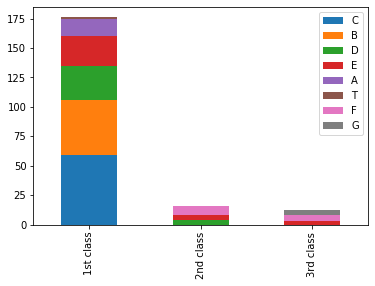

In [49]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True)

In [50]:
cabin_mapping = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'T': 7}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [51]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

## 7) 동행자 수 처리

In [52]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [53]:
for dataset in train_test_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [54]:
family_mapping = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6,8: 7, 9: 7, 10: 7, 11: 7}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [55]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,1,0,3,0,2.0,1,0,A/5 21171,0.0,5.0,0,0,1,0
1,2,1,1,1,4.0,1,0,PC 17599,3.0,2.0,1,2,1,0
2,3,1,3,1,3.0,0,0,STON/O2. 3101282,0.0,5.0,0,1,0,1
3,4,1,1,1,3.0,1,0,113803,2.0,2.0,0,2,1,0
4,5,0,3,0,3.0,0,0,373450,0.0,5.0,0,0,0,1


## 8) 불필요한 변수 삭제

In [56]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [57]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 9), (891,))

In [58]:
train_data['Age'] = train_data['Age'].astype(int)
train_data['Fare'] = train_data['Fare'].astype(int)
train_data['Cabin'] = train_data['Cabin'].astype(int)

In [59]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Pclass      891 non-null    int64
 1   Sex         891 non-null    int64
 2   Age         891 non-null    int32
 3   Fare        891 non-null    int32
 4   Cabin       891 non-null    int32
 5   Embarked    891 non-null    int64
 6   Title       891 non-null    int64
 7   FamilySize  891 non-null    int64
 8   IsAlone     891 non-null    int64
dtypes: int32(3), int64(6)
memory usage: 52.3 KB


In [60]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,3,0,2,0,5,0,0,1,0
1,1,1,4,3,2,1,2,1,0
2,3,1,3,0,5,0,1,0,1
3,1,1,3,2,2,0,2,1,0
4,3,0,3,0,5,0,0,0,1


In [61]:
test

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,892,3,0,3.0,0.0,5.0,2,0.0,0,1
1,893,3,1,5.0,0.0,5.0,0,2.0,1,0
2,894,2,0,6.0,0.0,5.0,2,0.0,0,1
3,895,3,0,3.0,0.0,5.0,0,0.0,0,1
4,896,3,1,2.0,0.0,5.0,0,2.0,2,0
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,3.0,0.0,5.0,0,0.0,0,1
414,1306,1,1,4.0,5.0,2.0,1,NaN,0,1
415,1307,3,0,4.0,0.0,5.0,0,0.0,0,1
416,1308,3,0,3.0,0.0,5.0,0,0.0,0,1


In [62]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   Fare         418 non-null    float64
 5   Cabin        418 non-null    float64
 6   Embarked     418 non-null    int64  
 7   Title        417 non-null    float64
 8   FamilySize   418 non-null    int64  
 9   IsAlone      418 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 32.8 KB


In [63]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Cabin          0
Embarked       0
Title          1
FamilySize     0
IsAlone        0
dtype: int64

 test data의 결측값을 2로 대체

In [64]:
test_data = test.fillna(2)

In [65]:
test_data['Age'] = test_data['Age'].astype(int)
test_data['Fare'] = test_data['Fare'].astype(int)
test_data['Cabin'] = test_data['Cabin'].astype(int)
test_data['Title'] = test_data['Title'].astype(int)

In [66]:
test_data

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,892,3,0,3,0,5,2,0,0,1
1,893,3,1,5,0,5,0,2,1,0
2,894,2,0,6,0,5,2,0,0,1
3,895,3,0,3,0,5,0,0,0,1
4,896,3,1,2,0,5,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,3,0,5,0,0,0,1
414,1306,1,1,4,5,2,1,2,0,1
415,1307,3,0,4,0,5,0,0,0,1
416,1308,3,0,3,0,5,0,0,0,1


# 3. 데이터 모델링, 예측 분석

In [67]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

from sklearn.preprocessing import StandardScaler

## 1) 데이터 스케일링(STD_scaling)

In [68]:
items = ['Age', 'Sex', 'Embarked', 'Fare','Cabin','Title', 'Pclass', 'FamilySize','IsAlone']

scaler = StandardScaler()

for var in items:
    train_data[var] = train_data[var].astype('float64')
    train_data[var] = scaler.fit_transform(train_data[var].values.reshape(-1, 1))

In [69]:
train_data

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,0.827377,-0.737695,-0.707591,-0.585208,0.686060,-0.568837,-0.693598,0.079458,-1.231645
1,-1.566107,1.355574,0.809770,1.212793,-1.550327,1.005181,1.142943,0.079458,-1.231645
2,0.827377,1.355574,0.051090,-0.585208,0.686060,-0.568837,0.224672,-0.588436,0.811922
3,-1.566107,1.355574,0.051090,0.613460,-1.550327,-0.568837,1.142943,0.079458,-1.231645
4,0.827377,-0.737695,0.051090,-0.585208,0.686060,-0.568837,-0.693598,-0.588436,0.811922
...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.737695,0.051090,-0.585208,-0.059403,-0.568837,2.061214,-0.588436,0.811922
887,-1.566107,1.355574,-0.707591,0.014126,-2.295790,-0.568837,0.224672,-0.588436,0.811922
888,0.827377,1.355574,0.051090,0.014126,0.686060,-0.568837,0.224672,1.415245,-1.231645
889,-1.566107,-0.737695,0.051090,0.014126,-1.550327,1.005181,-0.693598,-0.588436,0.811922


In [70]:
items = ['Age', 'Sex', 'Embarked', 'Fare','Cabin','Title', 'Pclass', 'FamilySize','IsAlone']

for var in items:
    test_data[var] = test_data[var].astype('float64')
    test_data[var] = scaler.fit_transform(test_data[var].values.reshape(-1, 1))
test_data

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,892,0.873482,-0.755929,0.033013,-0.584183,0.556106,2.243165,-0.709024,-0.594432,0.807573
1,893,0.873482,1.322876,1.566269,-0.584183,0.556106,-0.677841,1.109209,0.138526,-1.238278
2,894,-0.315819,-0.755929,2.332897,-0.584183,0.556106,2.243165,-0.709024,-0.594432,0.807573
3,895,0.873482,-0.755929,0.033013,-0.584183,0.556106,-0.677841,-0.709024,-0.594432,0.807573
4,896,0.873482,1.322876,-0.733615,-0.584183,0.556106,-0.677841,1.109209,0.871483,-1.238278
...,...,...,...,...,...,...,...,...,...,...
413,1305,0.873482,-0.755929,0.033013,-0.584183,0.556106,-0.677841,-0.709024,-0.594432,0.807573
414,1306,-1.505120,1.322876,0.799641,2.105117,-1.576483,0.782662,1.109209,-0.594432,0.807573
415,1307,0.873482,-0.755929,0.799641,-0.584183,0.556106,-0.677841,-0.709024,-0.594432,0.807573
416,1308,0.873482,-0.755929,0.033013,-0.584183,0.556106,-0.677841,-0.709024,-0.594432,0.807573


## 2) 데이터 분리

In [71]:
Xtrain, Xtest, ytrain, ytest = train_test_split(train_data, target)

## 3) 모델 예측, 정확도 산출

### (1) 선형회귀

In [72]:
model = LinearRegression(fit_intercept=True) 
x,y = Xtrain, ytrain
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
y_pred = model.predict(x)
mean_squared_error(y, y_pred)

0.13142968396998017

In [74]:
y_pred = model.predict(Xtest)

In [75]:
mean_squared_error(ytest, y_pred)

0.14315901365123052

### (2) 로지스틱 회귀

In [76]:
log_reg = LogisticRegression()
log_reg.fit(Xtrain, ytrain)
Y_pred = log_reg.predict(Xtest)
log_reg.score(Xtrain, ytrain)

0.8353293413173652

### (3) SVC

In [77]:
svc = SVC()
svc.fit(Xtrain, ytrain)
Y_pred = svc.predict(Xtest)
svc.score(Xtrain, ytrain)

0.8577844311377245

### (4) KNN Classifier

In [78]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(Xtrain, ytrain)
Y_pred = knn.predict(Xtest)
knn.score(Xtrain, ytrain)

0.8532934131736527

In [79]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(Xtrain, ytrain)
Y_pred = knn.predict(Xtest)
knn.score(Xtrain, ytrain)

0.8637724550898204

In [80]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(Xtrain, ytrain)
Y_pred = knn.predict(Xtest)
knn.score(Xtrain, ytrain)

0.8502994011976048

In [81]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(Xtrain, ytrain)
Y_pred = knn.predict(Xtest)
knn.score(Xtrain, ytrain)

0.8592814371257484

In [82]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(Xtrain, ytrain)
Y_pred = knn.predict(Xtest)
knn.score(Xtrain, ytrain)

0.8532934131736527

In [83]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(Xtrain, ytrain)
Y_pred = knn.predict(Xtest)
knn.score(Xtrain, ytrain)

0.8517964071856288

In [84]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(Xtrain, ytrain)
Y_pred = knn.predict(Xtest)
knn.score(Xtrain, ytrain)

0.8458083832335329

In [85]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(Xtrain, ytrain)
Y_pred = knn.predict(Xtest)
knn.score(Xtrain, ytrain)

0.8488023952095808

In [86]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(Xtrain, ytrain)
Y_pred = knn.predict(Xtest)
knn.score(Xtrain, ytrain)

0.844311377245509

In [87]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(Xtrain, ytrain)
Y_pred = knn.predict(Xtest)
knn.score(Xtrain, ytrain)

0.844311377245509

In [88]:
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(Xtrain, ytrain)
Y_pred = knn.predict(Xtest)
knn.score(Xtrain, ytrain)

0.8383233532934131

### (5) GaussianNB

In [89]:
gaussian = GaussianNB()
gaussian.fit(Xtrain, ytrain)
Y_pred = gaussian.predict(Xtest)
gaussian.score(Xtrain, ytrain)

0.781437125748503

### (6) 퍼셉트론

In [90]:
perceptron = Perceptron()
perceptron.fit(Xtrain, ytrain)
Y_pred = perceptron.predict(Xtest)
perceptron.score(Xtrain, ytrain)


0.7035928143712575

### (7) 선형 SVC

In [91]:
linear_svc = LinearSVC()
linear_svc.fit(Xtrain, ytrain)
Y_pred = linear_svc.predict(Xtest)
linear_svc.score(Xtrain, ytrain)

C:\Users\park\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8308383233532934

### (8) SGD Classifier

In [92]:
sgd = SGDClassifier()
sgd.fit(Xtrain, ytrain)
Y_pred = sgd.predict(Xtest)
sgd.score(Xtrain, ytrain)

0.8173652694610778

### (9) 의사결정나무

In [93]:
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(Xtrain, ytrain)
Y_pred = decision_tree.predict(Xtest)
decision_tree.score(Xtrain, ytrain)

0.9131736526946108

### (10) 랜덤포레스트

In [94]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(Xtrain, ytrain)
Y_pred = random_forest.predict(Xtest)
random_forest.score(Xtrain, ytrain)


0.9131736526946108

# 가장 결과가 좋은 랜덤포레스트로 테스트 검증

In [95]:
X_test  = test_data.drop("PassengerId",axis=1).copy()

In [96]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_data, target)
Y_pred = random_forest.predict(X_test)
random_forest.score(train_data, target)

submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": Y_pred
    })
submission
submission.to_csv('submission1.csv', index=False)

# 인공신경망(Neural Network)

In [97]:
import tensorflow as tf

In [99]:
import keras 
from keras.models import Sequential 
from keras.layers import Dense   

## 1) 데이터 전처리 - Normalization

In [100]:
from sklearn.preprocessing import Normalizer
Norm_scaler = Normalizer()

 
test_data2 = test.fillna(2)
test_data2

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,892,3,0,3.0,0.0,5.0,2,0.0,0,1
1,893,3,1,5.0,0.0,5.0,0,2.0,1,0
2,894,2,0,6.0,0.0,5.0,2,0.0,0,1
3,895,3,0,3.0,0.0,5.0,0,0.0,0,1
4,896,3,1,2.0,0.0,5.0,0,2.0,2,0
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,3.0,0.0,5.0,0,0.0,0,1
414,1306,1,1,4.0,5.0,2.0,1,2.0,0,1
415,1307,3,0,4.0,0.0,5.0,0,0.0,0,1
416,1308,3,0,3.0,0.0,5.0,0,0.0,0,1


In [101]:
for var in items:
    train[var] = train[var].astype('float64')
    train[var] = Norm_scaler.fit_transform(train)

for var in items:
    test_data2[var] = test_data2[var].astype('float64')
    test_data2[var] = Norm_scaler.fit_transform(test_data2)

train



,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0.542631,0.213073,0.162221,0.222944,0.299223,0.217846,0.371175,0.609639,0.696346
2,1,0.298661,0.162176,0.145865,0.164234,0.164174,0.164293,0.287142,0.659360,0.604685
3,1,0.537600,0.249688,0.200000,0.256760,0.298348,0.257323,0.369522,0.603126,0.687969
4,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
886,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
887,1,0.503760,0.375534,0.301511,0.395520,0.424521,0.400579,0.459847,0.559517,0.533963
888,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
889,1,0.512024,0.332309,0.235702,0.347627,0.367708,0.330301,0.532161,0.570127,0.542203


In [102]:
train2 = train.drop('Survived', axis=1)
target2 = train['Survived']
Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(train2, target2)

In [103]:
train2

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.542631,0.213073,0.162221,0.222944,0.299223,0.217846,0.371175,0.609639,0.696346
2,0.298661,0.162176,0.145865,0.164234,0.164174,0.164293,0.287142,0.659360,0.604685
3,0.537600,0.249688,0.200000,0.256760,0.298348,0.257323,0.369522,0.603126,0.687969
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
886,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
887,0.503760,0.375534,0.301511,0.395520,0.424521,0.400579,0.459847,0.559517,0.533963
888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
889,0.512024,0.332309,0.235702,0.347627,0.367708,0.330301,0.532161,0.570127,0.542203


In [104]:
target2

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [105]:
Xtrain2

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
706,0.399983,0.178825,0.145479,0.181560,0.181461,0.181659,0.313851,0.644087,0.594925
824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
509,0.298635,0.158074,0.142857,0.157975,0.166446,0.158024,0.299839,0.659078,0.604509
838,0.298635,0.158074,0.142857,0.157975,0.166446,0.158024,0.299839,0.659078,0.604509
221,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
520,0.527426,0.213045,0.179605,0.217571,0.439696,0.217816,0.478597,0.589974,0.557186
229,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
782,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
213,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [106]:
ytrain2

706    1
824    0
509    1
838    1
221    0
      ..
520    1
229    0
782    0
213    0
806    0
Name: Survived, Length: 668, dtype: int64

## 2) 인공신경망 아키텍처 구축

In [107]:
model = Sequential()

model.add(Dense(16, activation='relu', input_shape=(9,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## 3) 모델 피팅

In [108]:
model.fit(Xtrain, ytrain, epochs=50, batch_size=1, verbose=1)

Epoch 1/50
668/668 [==============================] - 1s 1ms/step - loss: 0.4924 - accuracy: 0.8114
Epoch 2/50
668/668 [==============================] - 1s 1ms/step - loss: 0.4317 - accuracy: 0.8293
Epoch 3/50
668/668 [==============================] - 1s 1ms/step - loss: 0.4132 - accuracy: 0.8189
Epoch 4/50
668/668 [==============================] - 1s 1ms/step - loss: 0.4039 - accuracy: 0.8308
Epoch 5/50
668/668 [==============================] - 1s 1ms/step - loss: 0.3968 - accuracy: 0.8368
Epoch 6/50
668/668 [==============================] - 1s 1ms/step - loss: 0.3891 - accuracy: 0.8338
Epoch 7/50
668/668 [==============================] - 1s 1ms/step - loss: 0.3866 - accuracy: 0.8413
Epoch 8/50
668/668 [==============================] - 1s 1ms/step - loss: 0.3816 - accuracy: 0.8503
Epoch 9/50
668/668 [==============================] - 1s 1ms/step - loss: 0.3785 - accuracy: 0.8533
Epoch 10/50
668/668 [==============================] - 1s 1ms/step - loss: 0.3767 - accuracy: 0.8488

In [109]:
to_test = test_data.copy(True)

In [ ]:
to_test = to_test.drop('PassengerId', axis=1)
to_test

## 4) 학습된 모델을 사용하여 테스트 파일 예측 검증

In [ ]:
predictions = model.predict_classes(to_test).flatten()
predictions[:10]

In [ ]:
submission = pd.DataFrame({
    "PassengerId": test_data2["PassengerId"],
    "Survived": predictions
})

In [ ]:
submission

In [ ]:
submission.to_csv('submission2.csv', index=False)